In [1]:
# import libraries
import pandas as pd
import ast
from datasets import load_dataset
import matplotlib.pyplot as plt

# loading data
dataset= load_dataset('lukebarousse/data_jobs')
df= dataset['train'].to_pandas()

# data cleaning
df['job_posted_date']= pd.to_datetime(df['job_posted_date'])
df['job_skills']= df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

# Pie Charts

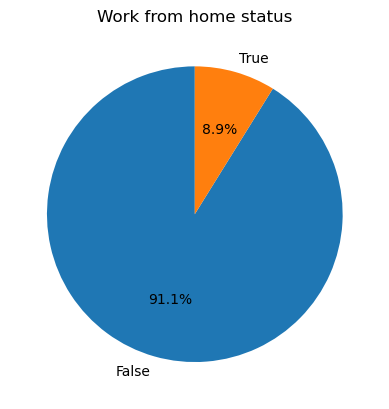

In [13]:
df['job_work_from_home'].value_counts().plot(kind='pie', startangle=90, autopct='%1.1f%%')
plt.title('Work from home status')
plt.ylabel("")
plt.show()

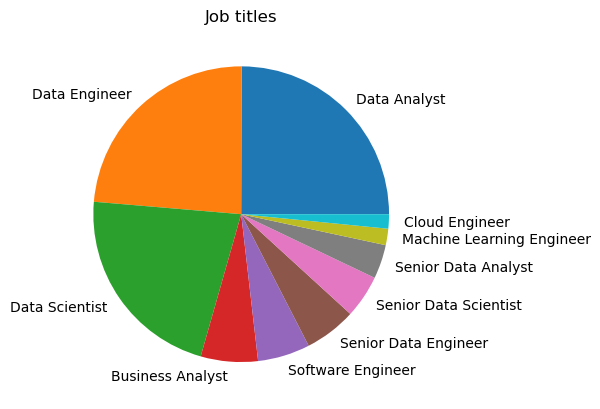

In [6]:
df['job_title_short'].value_counts().plot(kind='pie')
plt.title('Job titles')
plt.ylabel("")
plt.show()

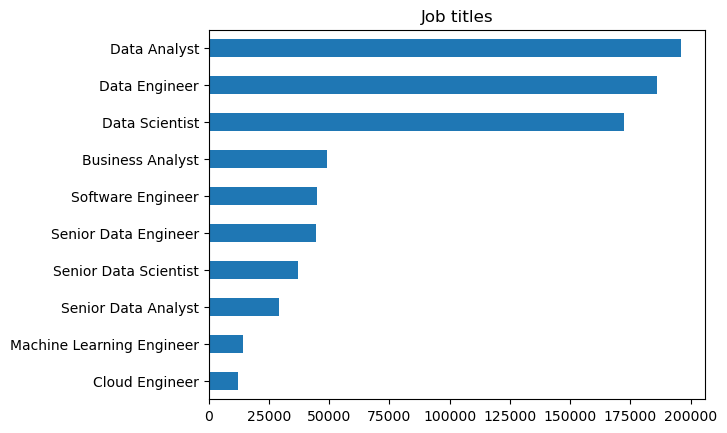

In [10]:
df['job_title_short'].value_counts().plot(kind='barh')
plt.title('Job titles')
plt.gca().invert_yaxis()
plt.ylabel("")
plt.show()

In [15]:
df[['job_work_from_home', 'job_no_degree_mention', 'job_health_insurance']]

,job_work_from_home,job_no_degree_mention,job_health_insurance
0,False,False,False
1,False,False,False
2,False,False,False
3,False,True,False
4,False,False,False
...,...,...,...
785736,False,False,False
785737,False,False,False
785738,False,False,False
785739,False,False,False


0 job_work_from_home Work from Home Offered
1 job_no_degree_mention Degree Requirement
2 job_health_insurance Health Insurance Offered


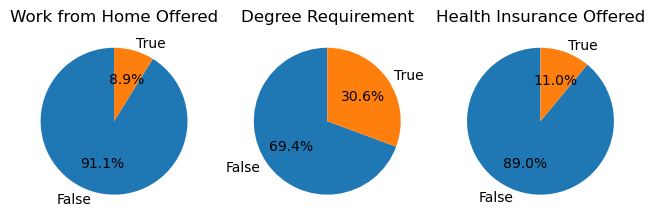

In [21]:
fig, ax= plt.subplots(1,3)

dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'}

for i, (column, title) in enumerate(dict_column.items()):
    print(i, column, title)
    ax[i].pie(df[column].value_counts(), startangle=90, autopct='%1.1f%%', labels=['False', 'True'])
    ax[i].set_title(title)

fig.tight_layout()

plt.show()

# Scatter Plots

In [22]:
df = df[df['job_title_short'] == 'Data Analyst'].copy()

In [32]:
df_exploded= df.explode('job_skills')

skill_stats= df_exploded.groupby('job_skills').agg(
    skill_count=('job_skills','count'),
    median_salary= ('salary_year_avg', 'median')
)

skill_stats= skill_stats.sort_values(by='skill_count', ascending=False).head(10)

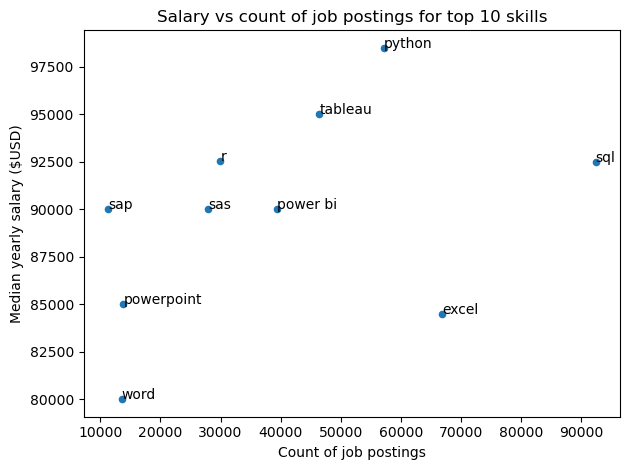

In [35]:
skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')
plt.title('Salary vs count of job postings for top 10 skills')
plt.xlabel('Count of job postings')
plt.ylabel('Median yearly salary ($USD)')
plt.tight_layout()

# diamo i nomi ai puntini
for i, txt in enumerate(skill_stats.index):
    plt.text(skill_stats['skill_count'].iloc[i],skill_stats['median_salary'].iloc[i], txt)

plt.show()

# Customizzazione

Da Exercise Trending Skills

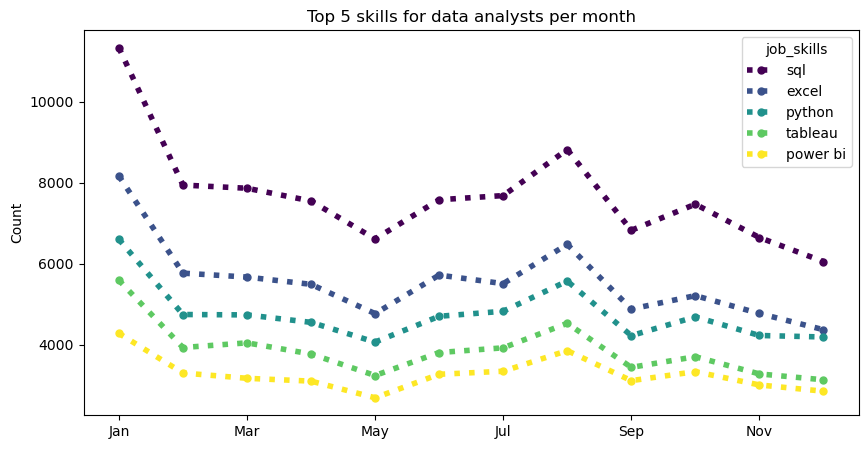

In [ ]:
df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()
# create a new column for month number
df_DA['job_posted_month_no'] = df_DA['job_posted_date'].dt.month

# Explode the job_skills column and pivot
df_DA_explode= df_DA.explode('job_skills')
df_DA_pivot = df_DA_explode.pivot_table(index='job_posted_month_no', columns='job_skills',  aggfunc='size', fill_value=0)

# sort the skills by count
df_DA_pivot.loc['Total'] = df_DA_pivot.sum()
df_DA_pivot = df_DA_pivot[df_DA_pivot.loc['Total'].sort_values(ascending=False).index]
df_DA_pivot = df_DA_pivot.drop('Total')

# Use month names for plotting
df_DA_pivot = df_DA_pivot.reset_index()
df_DA_pivot['job_posted_month'] = df_DA_pivot['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_DA_pivot = df_DA_pivot.set_index('job_posted_month')
df_DA_pivot = df_DA_pivot.drop(columns='job_posted_month_no')

# rappresenta le prime 5 colonne (skills)
df_DA_pivot.iloc[:,:5].plot(
    kind='line',
    linewidth= 4,
    linestyle=':', #options: '-', '--', '-.', ':'
    colormap='viridis',
    marker='o', # options; o, x, *, +, s, , . 1, 2, ...
    markersize= 5,
    figsize= (10,5)
    )
plt.title('Top 5 skills for data analysts per month')
plt.ylabel('Count')
plt.xlabel('')
plt.show()

Da Scatter Plot

In [44]:
# Explode the 'job_skills' into individual rows
df_exploded = df_DA.explode('job_skills')

# Calculate the average salary and count of job postings per skill
skill_stats = df_exploded.groupby('job_skills').agg(
    median_salary=('salary_year_avg', 'median'),
    skill_count=('job_skills', 'count')
)

# Limit to the top skills
skill_count = 20
skill_stats = skill_stats.sort_values(by='skill_count', ascending=False).head(skill_count)



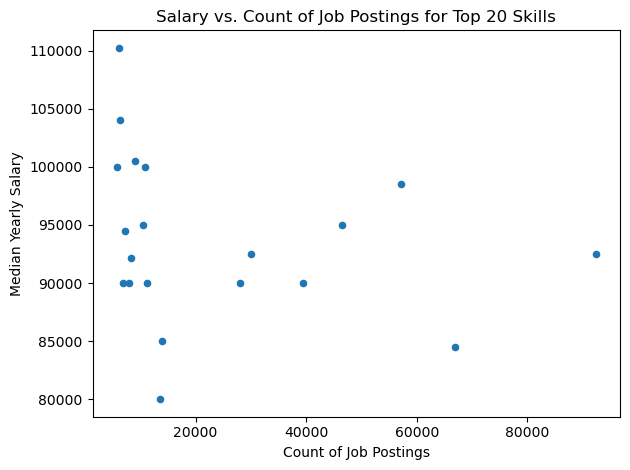

In [45]:
skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary')
plt.title(f'Salary vs. Count of Job Postings for Top {skill_count} Skills')
plt.tight_layout()
plt.show()

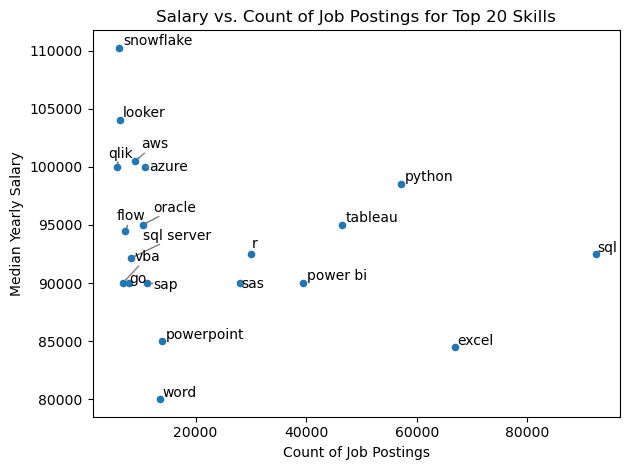

In [ ]:
from adjustText import adjust_text

skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')

texts= []

for i, txt in enumerate(skill_stats.index):
    texts.append(plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt))

adjust_text(texts, arrowprops=dict(arrowstyle="->",color='gray',lw=1))  # copiato da sito

plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary')
plt.title(f'Salary vs. Count of Job Postings for Top {skill_count} Skills')
plt.tight_layout()
plt.show()

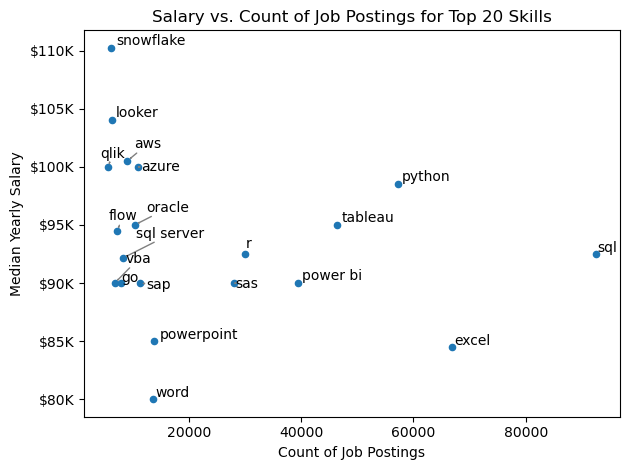

In [54]:
# fig, ax = plt.subplots()  

skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')

texts= []

for i, txt in enumerate(skill_stats.index):
    texts.append(plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt))

adjust_text(texts, arrowprops=dict(arrowstyle="->",color='gray',lw=1))  # copiato da sito

ax= plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))

plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary')
plt.title(f'Salary vs. Count of Job Postings for Top {skill_count} Skills')
plt.tight_layout()
plt.show()